In [14]:
import pandas as pd
import pandas as pd
import sklearn

#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [15]:
train1 = pd.read_csv(r'E:\project\FINAL\featureseca.csv')
train1.head()

,1)School,2) Sex,3) Age,4) Home address type,5) Parent's cohabitation status,6) Mother's education,7) Father's education,8) Mother's job,9) Father's job,10) Family size,...,29) Walc,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,ECA,F,22,U,T,4,4,teacher,other,LE3,...,1,7,18,19,19,DSP,Excellent,Always Regular,Excellent,Excellent
1,ECA,F,23,R,T,4,4,at_home,other,LE3,...,1,10,0,0,0,DSP,Failure,Mostly Regular,Failure,Failure
2,ECA,F,22,R,T,4,4,at_home,other,GT3,...,1,9,17,20,18,DSP,Excellent,Always Regular,Good,Excellent
3,ECA,F,22,U,T,4,4,services,services,GT3,...,1,6,17,18,16,DSP,Good,Always Regular,Good,Excellent
4,ECA,M,22,U,T,4,4,teacher,services,GT3,...,1,8,10,12,14,DSP,Satisfactory,Always Regular,Poor,Satisfactory


In [16]:
le=preprocessing.LabelEncoder()
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)

train1 = pd.get_dummies(train1)

train1.head()

,3) Age,6) Mother's education,7) Father's education,13) Travel time from home to college,14)Failures,15) Weekly study time,20) How would you rate your relationship with your family ?,21) How would you rate your free time after college ?,22) How often do you go out with your friends ?,23) Current health status,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,22,4,4,3,0,2,4,3,3,5,...,1,0,0,0,0,1,0,0,0,0
1,23,4,4,4,4,2,5,4,4,5,...,0,1,0,0,0,0,1,0,0,0
2,22,4,4,2,0,2,5,4,3,5,...,0,0,1,0,0,1,0,0,0,0
3,22,4,4,2,0,2,5,4,3,5,...,0,0,1,0,0,1,0,0,0,0
4,22,4,4,2,0,2,4,4,4,5,...,0,0,0,1,0,0,0,0,0,1


In [17]:
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade'],axis=1)
train1.head()

,3) Age,6) Mother's education,7) Father's education,13) Travel time from home to college,14)Failures,15) Weekly study time,20) How would you rate your relationship with your family ?,21) How would you rate your free time after college ?,22) How often do you go out with your friends ?,23) Current health status,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,22,4,4,3,0,2,4,3,3,5,...,1,0,0,0,0,1,0,0,0,0
1,23,4,4,4,4,2,5,4,4,5,...,0,1,0,0,0,0,1,0,0,0
2,22,4,4,2,0,2,5,4,3,5,...,0,0,1,0,0,1,0,0,0,0
3,22,4,4,2,0,2,5,4,3,5,...,0,0,1,0,0,1,0,0,0,0
4,22,4,4,2,0,2,4,4,4,5,...,0,0,0,1,0,0,0,0,0,1


In [18]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train1,y,random_state=0,test_size=0.3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(41, 76)
(41,)
(18, 76)
(18,)


In [19]:
#Defining learning classifiers

names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD", "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2"),
    LogisticRegression()]

In [20]:
#Build Model, Apply Model on Test Data & Record Accuracy Scores

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
scores

[0.5555555555555556,
 0.8888888888888888,
 0.4444444444444444,
 0.4444444444444444,
 0.3888888888888889,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.7777777777777778,
 0.5555555555555556,
 0.6666666666666666,
 0.5555555555555556,
 0.3333333333333333,
 0.6111111111111112,
 0.5555555555555556]

In [23]:
import pandas as pd
import seaborn as sns
# Create data frame of model performance

df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.555556
1,Linear_SVM,0.888889
2,Polynomial_SVM,0.444444
3,RBF_SVM,0.444444
4,Gaussian_Process,0.388889
5,Gradient_Boosting,0.666667
6,Decision_Tree,0.611111
7,Extra_Trees,0.666667
8,Random_Forest,0.777778
9,Neural_Net,0.555556


In [26]:
#Adding colors to the data frame


cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.555556
1,Linear_SVM,0.888889
2,Polynomial_SVM,0.444444
3,RBF_SVM,0.444444
4,Gaussian_Process,0.388889
5,Gradient_Boosting,0.666667
6,Decision_Tree,0.611111
7,Extra_Trees,0.666667
8,Random_Forest,0.777778
9,Neural_Net,0.555556


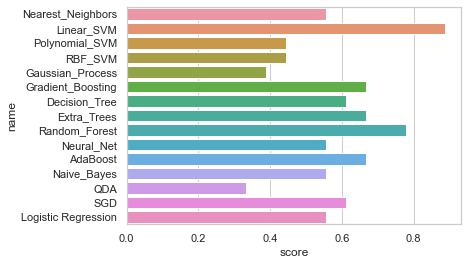

In [27]:
#Bar plot of model performance

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)